In [1]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('../data/datasets/training_data_small_track_symetric.csv')
print(f'{df.shape=}')
df.sample(5)

df.shape=(5940, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
2027,-0.3,0.381544,-2.658220,2.551310,-5.228757,5.609334,-6.672204,8.926806,-7.403284,12.268455,-8.026359,15.663288,-8.186186,19.061114,-8.277126,22.323371,-7.488575,24.435933,-4.905331
3766,0.3,1.866181,1.460208,5.093803,2.438242,8.467748,2.114074,11.660026,0.987127,14.198132,-1.252973,16.207892,-3.991505,18.142650,-6.787115,19.755357,-9.779297,21.354704,-12.779583
2427,0.0,2.674276,-0.492673,6.069109,-0.652506,9.466935,-0.743452,12.729194,0.045093,14.841759,2.628334,14.969674,6.068013,14.969686,9.467987,15.442200,12.827737,16.123234,16.158830
1111,-0.1,-0.640859,-0.227182,-3.391414,-2.180334,-5.521870,-4.821346,-7.458550,-7.615766,-9.167691,-10.549294,-10.767040,-13.549642,-12.366369,-16.549971,-13.965680,-19.550279,-15.565028,-22.550627
401,0.0,0.136174,0.666196,0.817157,3.997299,1.498121,7.328382,1.610595,10.697864,-0.227708,13.482981,-3.239055,15.004526,-6.612536,15.125137,-9.915031,14.345805,-12.745550,12.517169


In [3]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4752, 18), (1188, 18), (4752,), (1188,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [5]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/100
149/149 [==============================] - 3s 5ms/step - loss: 0.0085 - mae: 0.0663 - val_loss: 0.0084 - val_mae: 0.0696
Epoch 2/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0057 - mae: 0.0552 - val_loss: 0.0030 - val_mae: 0.0413
Epoch 3/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0047 - mae: 0.0505 - val_loss: 0.0036 - val_mae: 0.0448
Epoch 4/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0047 - mae: 0.0498 - val_loss: 0.0030 - val_mae: 0.0419
Epoch 5/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0044 - mae: 0.0476 - val_loss: 0.0023 - val_mae: 0.0356
Epoch 6/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0043 - mae: 0.0471 - val_loss: 0.0024 - val_mae: 0.0361
Epoch 7/100
149/149 [==============================] - 1s 3ms/step - loss: 0.0040 - mae: 0.0458 - val_loss: 0.0026 - val_mae: 0.0382
Epoch 8/100
149/149 [==============================] - 1s 4ms/step - 

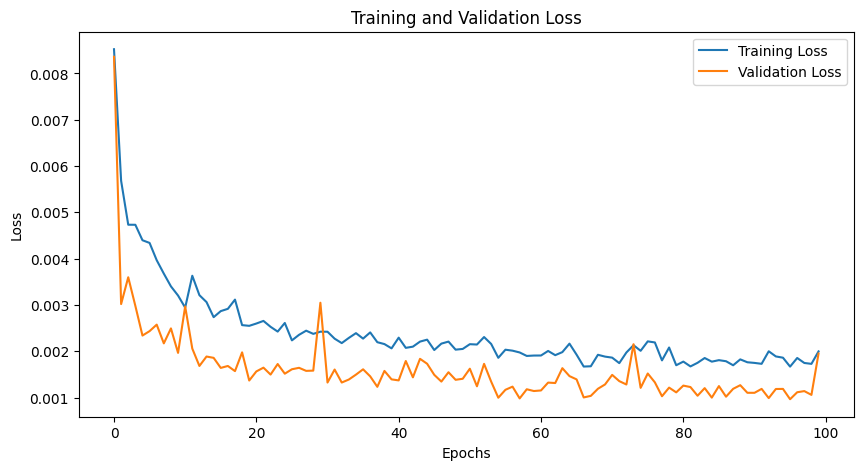

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

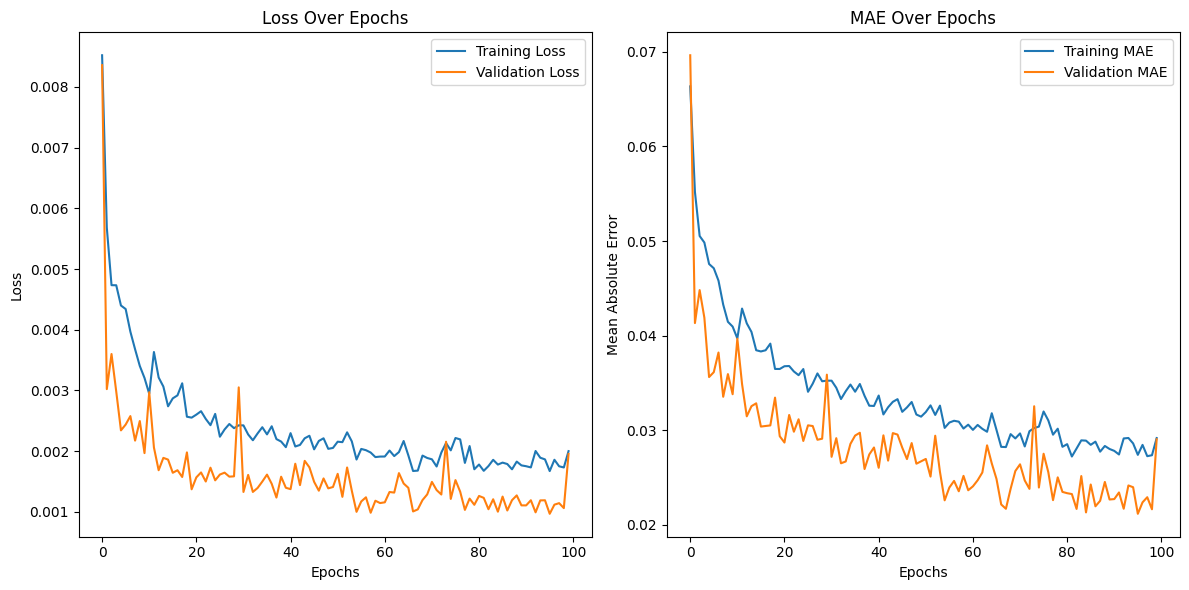

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [8]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

38/38 [==============================] - 0s 2ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.000965
1,Mean Absolute Error (MAE),0.021155
2,R-squared (R2),0.958583


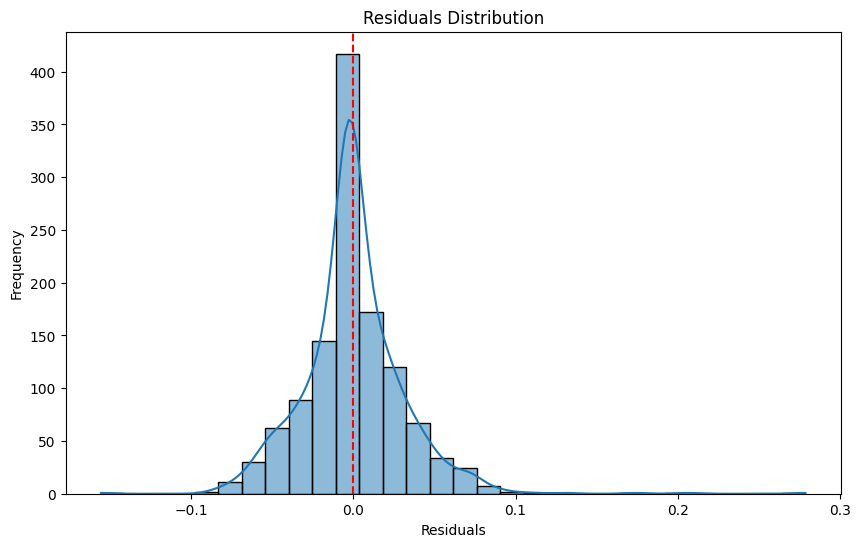

In [9]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

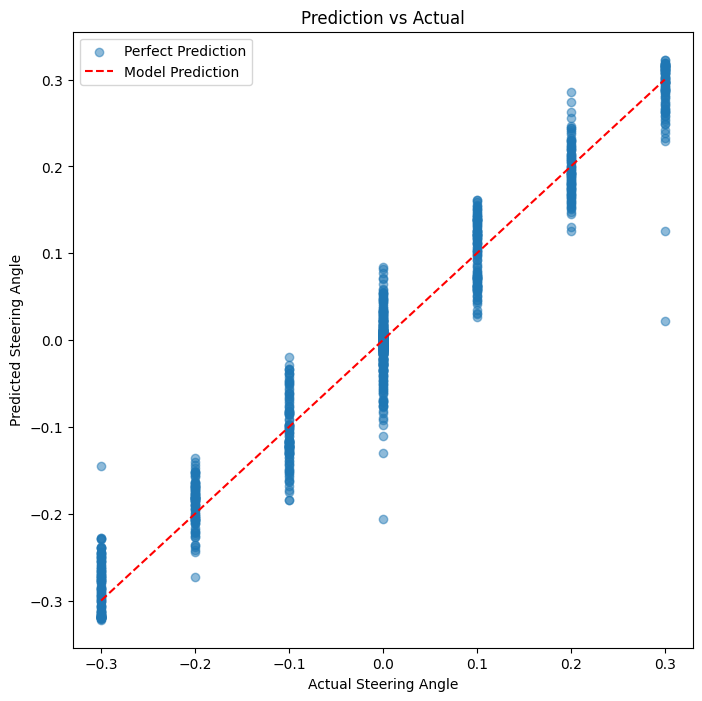

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [11]:
name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [12]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [13]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "timestamp": "20250601_122925",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_NN_20250601_122925.h5",
        "final_training_loss": 0.001998025458306074,
        "final_validation_loss": 0.0019523513037711382
    },
    "evaluation": {
        "mse": 0.0009653431864343216,
        "mae": 0.02115483755133697,
        "r2": 0.9585832151748331
    }
}
